#1. Edge Detection

In [203]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [204]:
!ls -al

total 34680
drwxr-xr-x 1 root root    4096 Sep 24 07:03  .
drwxr-xr-x 1 root root    4096 Sep 24 05:34  ..
-rw-r--r-- 1 root root 8149072 Sep 24 07:04  city_road_2.png
-rw-r--r-- 1 root root 7916447 Sep 24 06:25  city_road.png
drwxr-xr-x 4 root root    4096 Sep 16 13:39  .config
-rw-r--r-- 1 root root 6821385 Sep 24 05:41 'highway_road (1).png'
-rw-r--r-- 1 root root 6247833 Sep 24 05:50  highway_road_2.png
-rw-r--r-- 1 root root 6350604 Sep 24 05:37  highway_road.png
drwxr-xr-x 1 root root    4096 Sep 16 13:40  sample_data


In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

In [235]:
file_name = 'city_road.png'
frame = cv2.imread(file_name)
cv2_imshow(frame)
height, width, channel = frame.shape
print(height, width, channel)

Output hidden; open in https://colab.research.google.com to view.

In [236]:
#Convert the image to graysacle
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
height, width = gray.shape
cv2_imshow(gray)
print(height, width)

Output hidden; open in https://colab.research.google.com to view.

In [237]:
# GaussianBlur for refucing noise
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(blur)

Output hidden; open in https://colab.research.google.com to view.

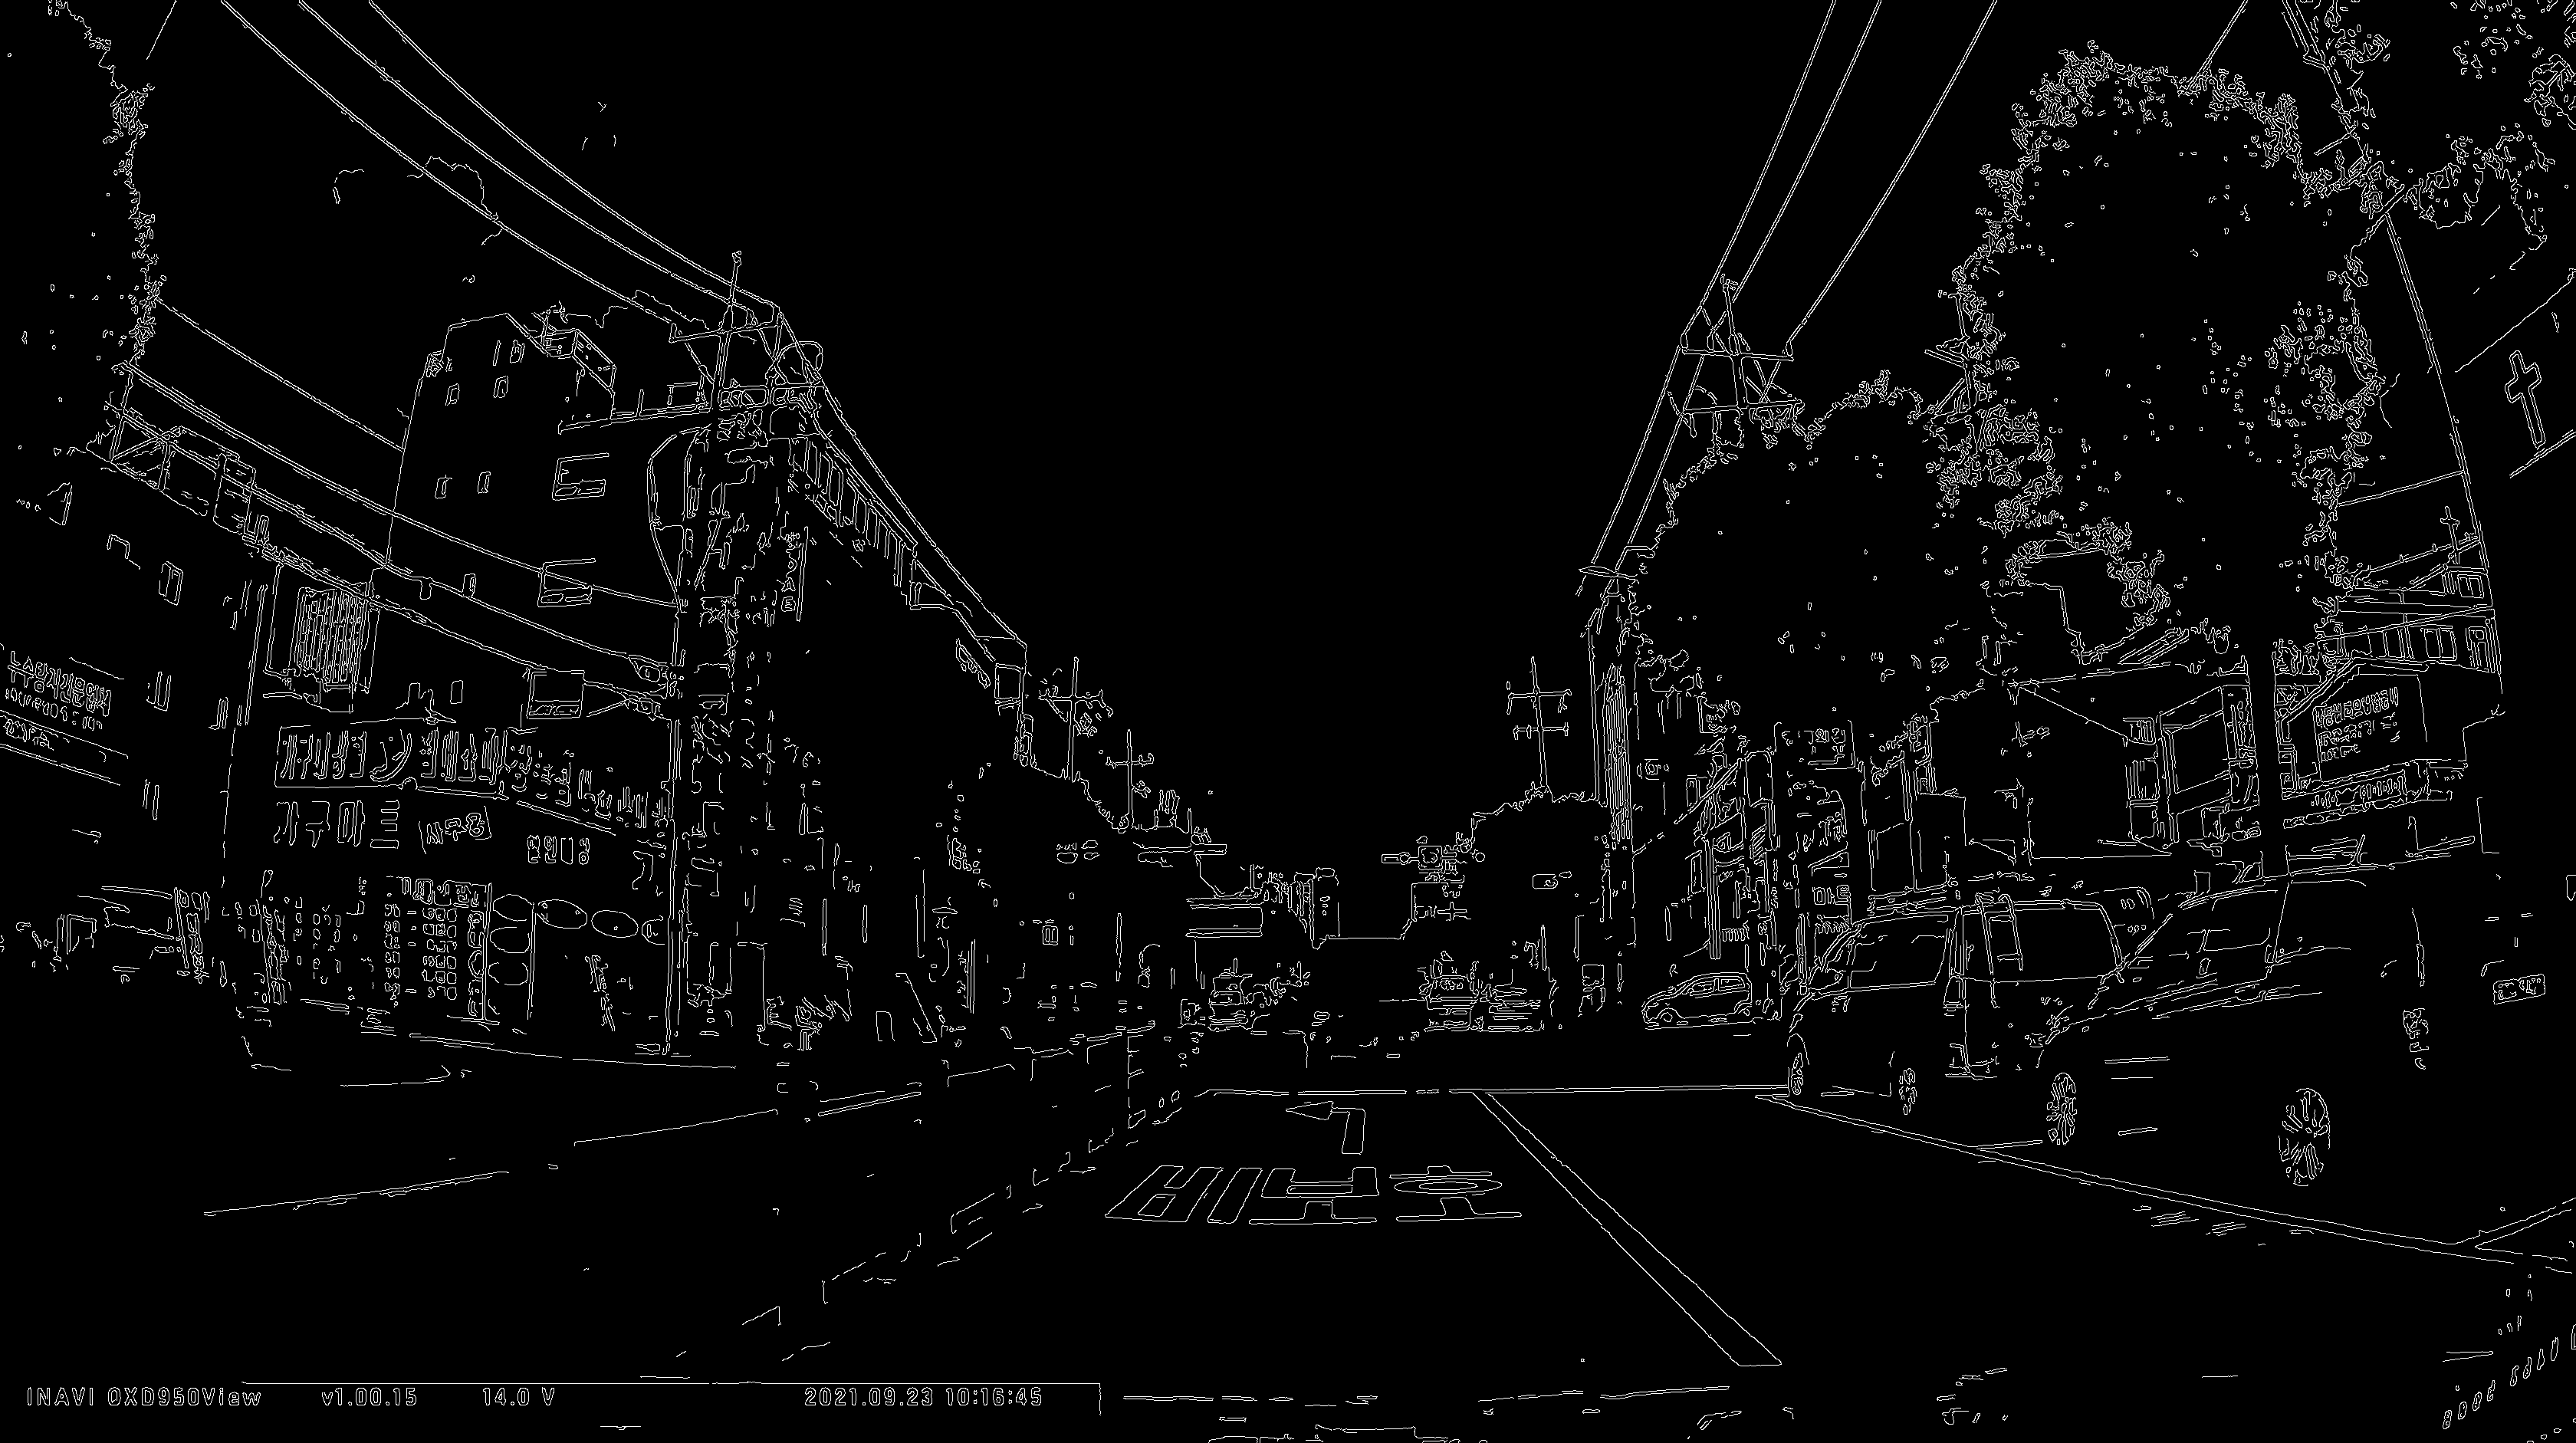

In [238]:
canny = cv2.Canny(blur, 70, 130)
cv2_imshow(canny)

#2. Region of Interest

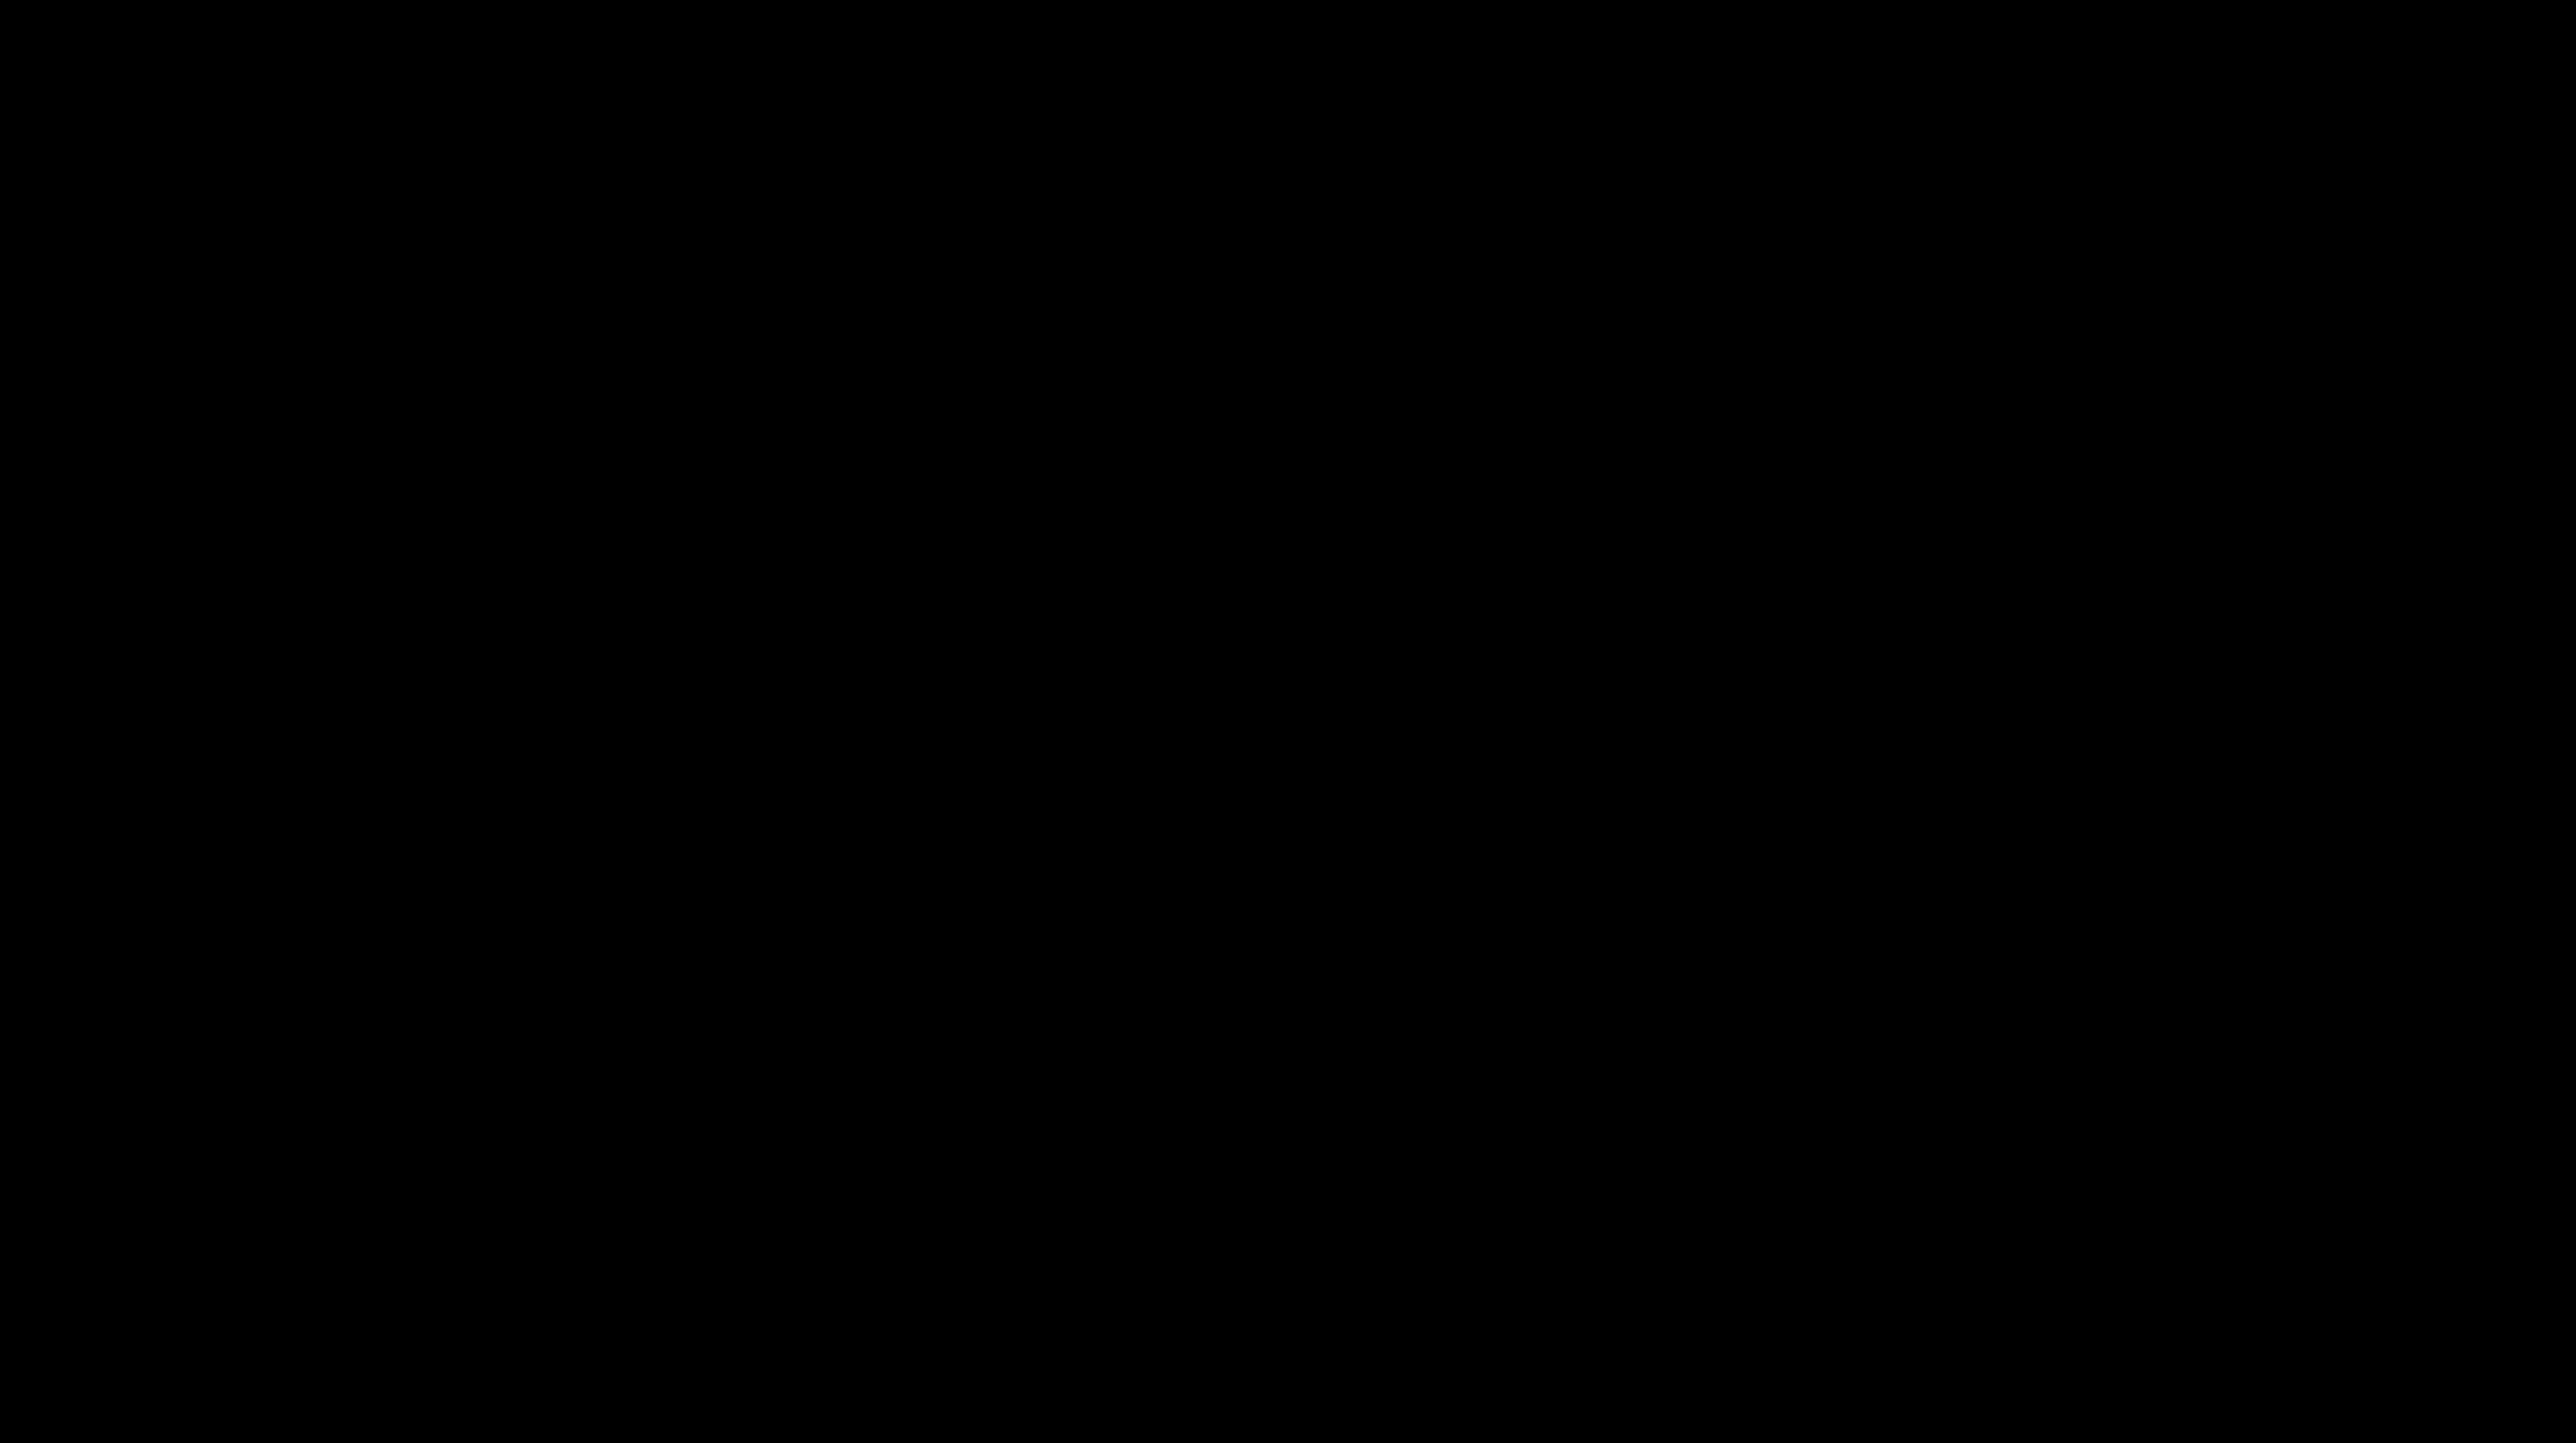

In [ ]:
mask = np.zeros((height, width), dtype='uint8')
cv2_imshow(mask)

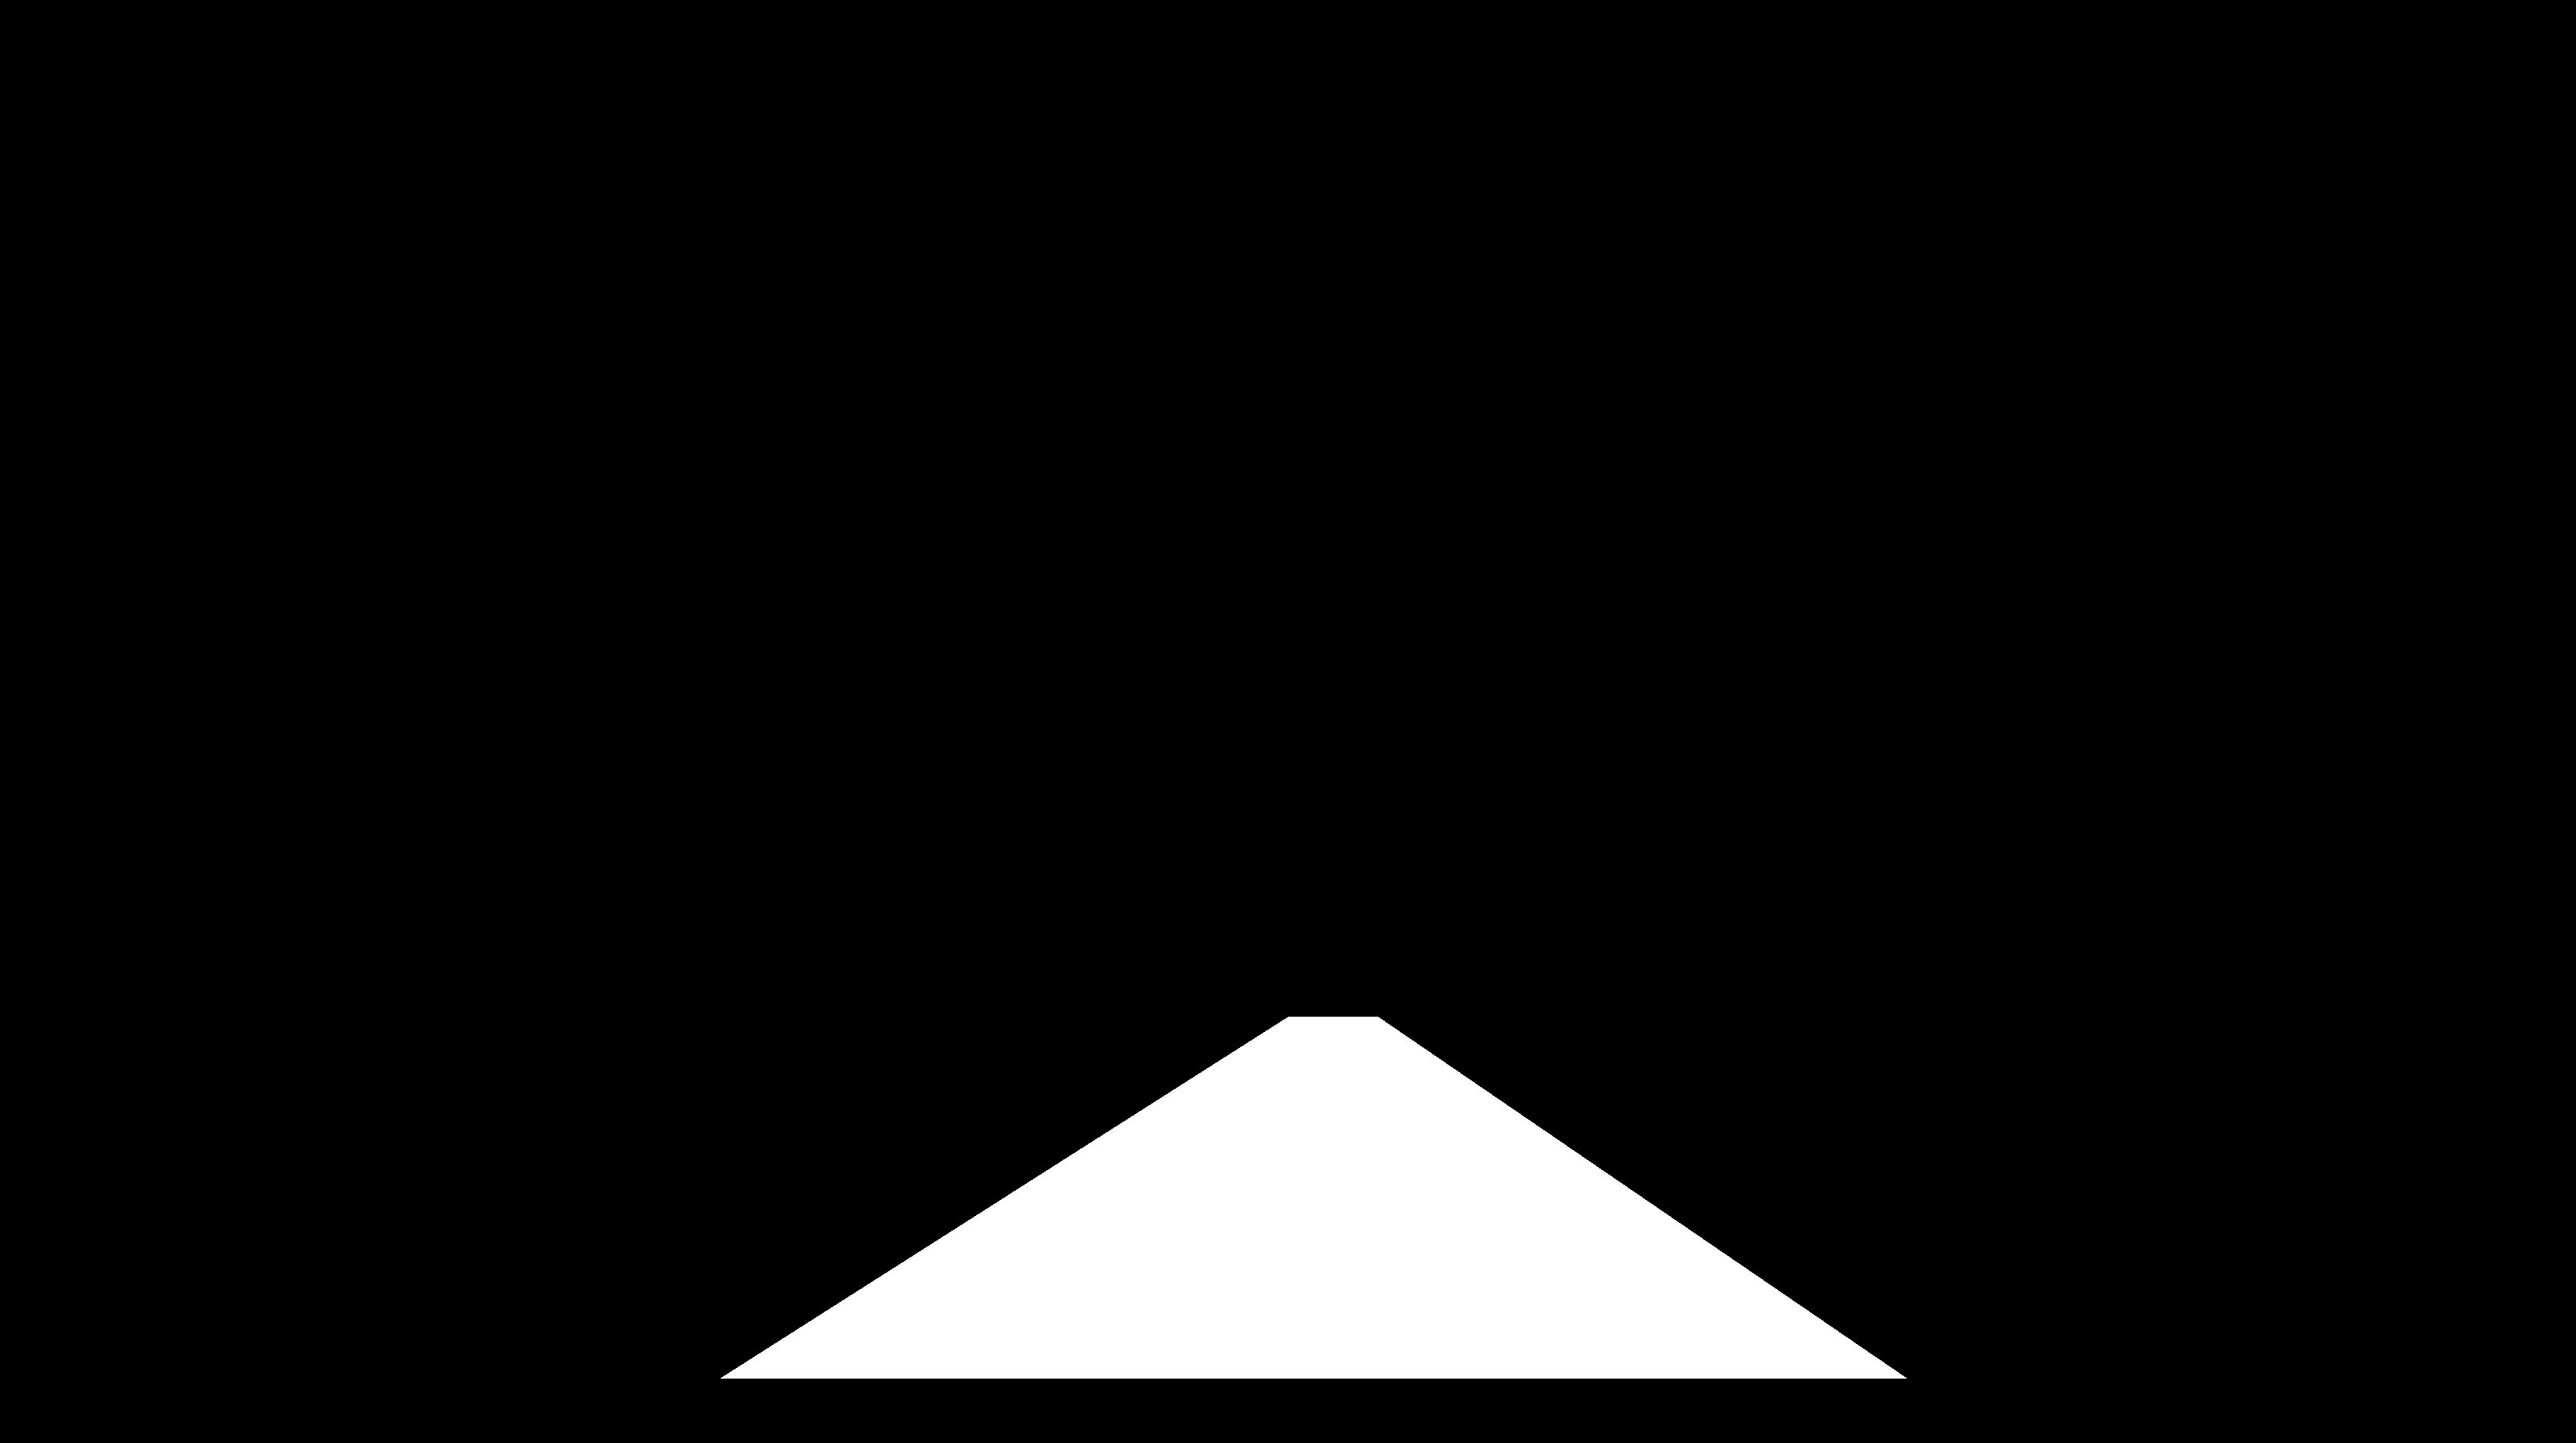

In [230]:
out_mask = np.zeros((height, width), dtype='uint8')

poly_heigh = int(0.705 * height)
poly_left = int(0.50 * width)
poly_right = int(0.535 * width)
poly_bottom = int(0.955 * height)
poly_right_bottom = int(0.74 * width)
poly_left_bottom = int(0.28 * width)
polygons = np.array([[(poly_left_bottom, poly_bottom), (poly_left, poly_heigh), (poly_right, poly_heigh), (poly_right_bottom, poly_bottom)]])
cv2.fillPoly(out_mask, polygons, 255)
cv2_imshow(out_mask)

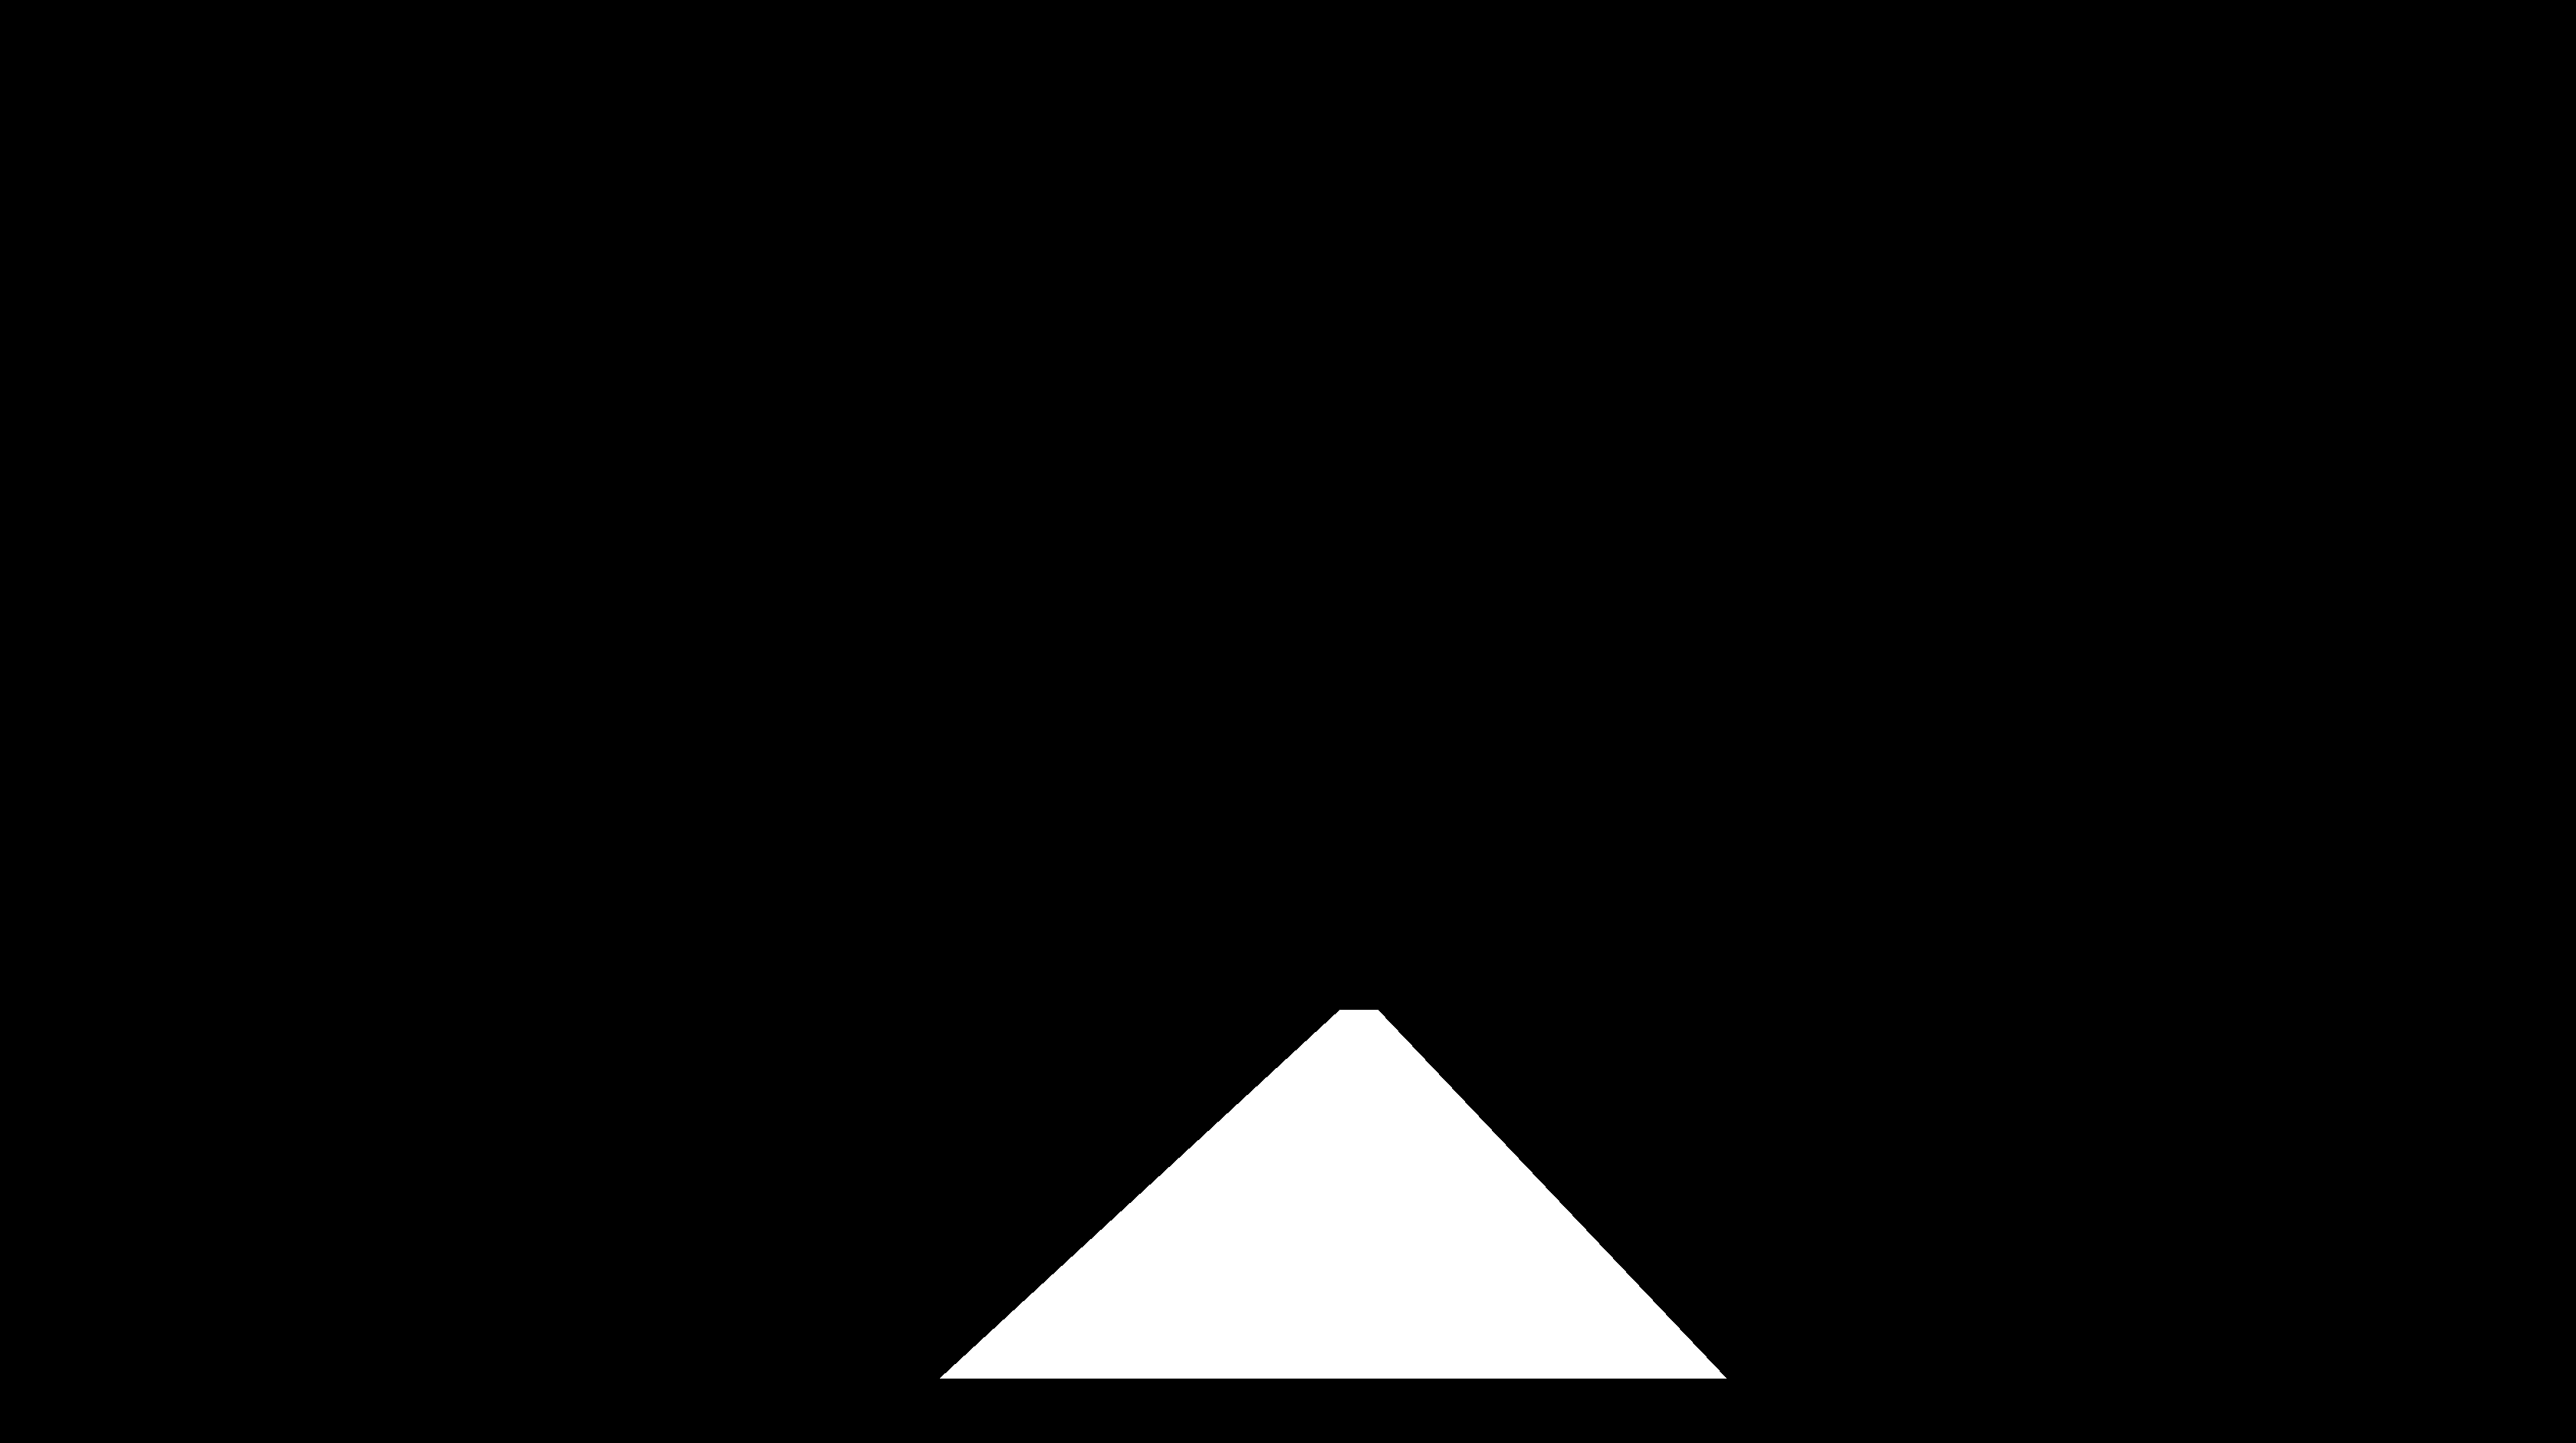

In [242]:
in_mask = np.zeros((height, width), dtype='uint8')

poly_heigh = int(0.70 * height)
poly_left = int(0.52 * width)
poly_right = int(0.535 * width)
poly_bottom = int(0.955 * height)
poly_right_bottom = int(0.67 * width)
poly_left_bottom = int(0.365 * width)
polygons = np.array([[(poly_left_bottom, poly_bottom), (poly_left, poly_heigh), (poly_right, poly_heigh), (poly_right_bottom, poly_bottom)]])
cv2.fillPoly(in_mask, polygons, 255)
cv2_imshow(in_mask)

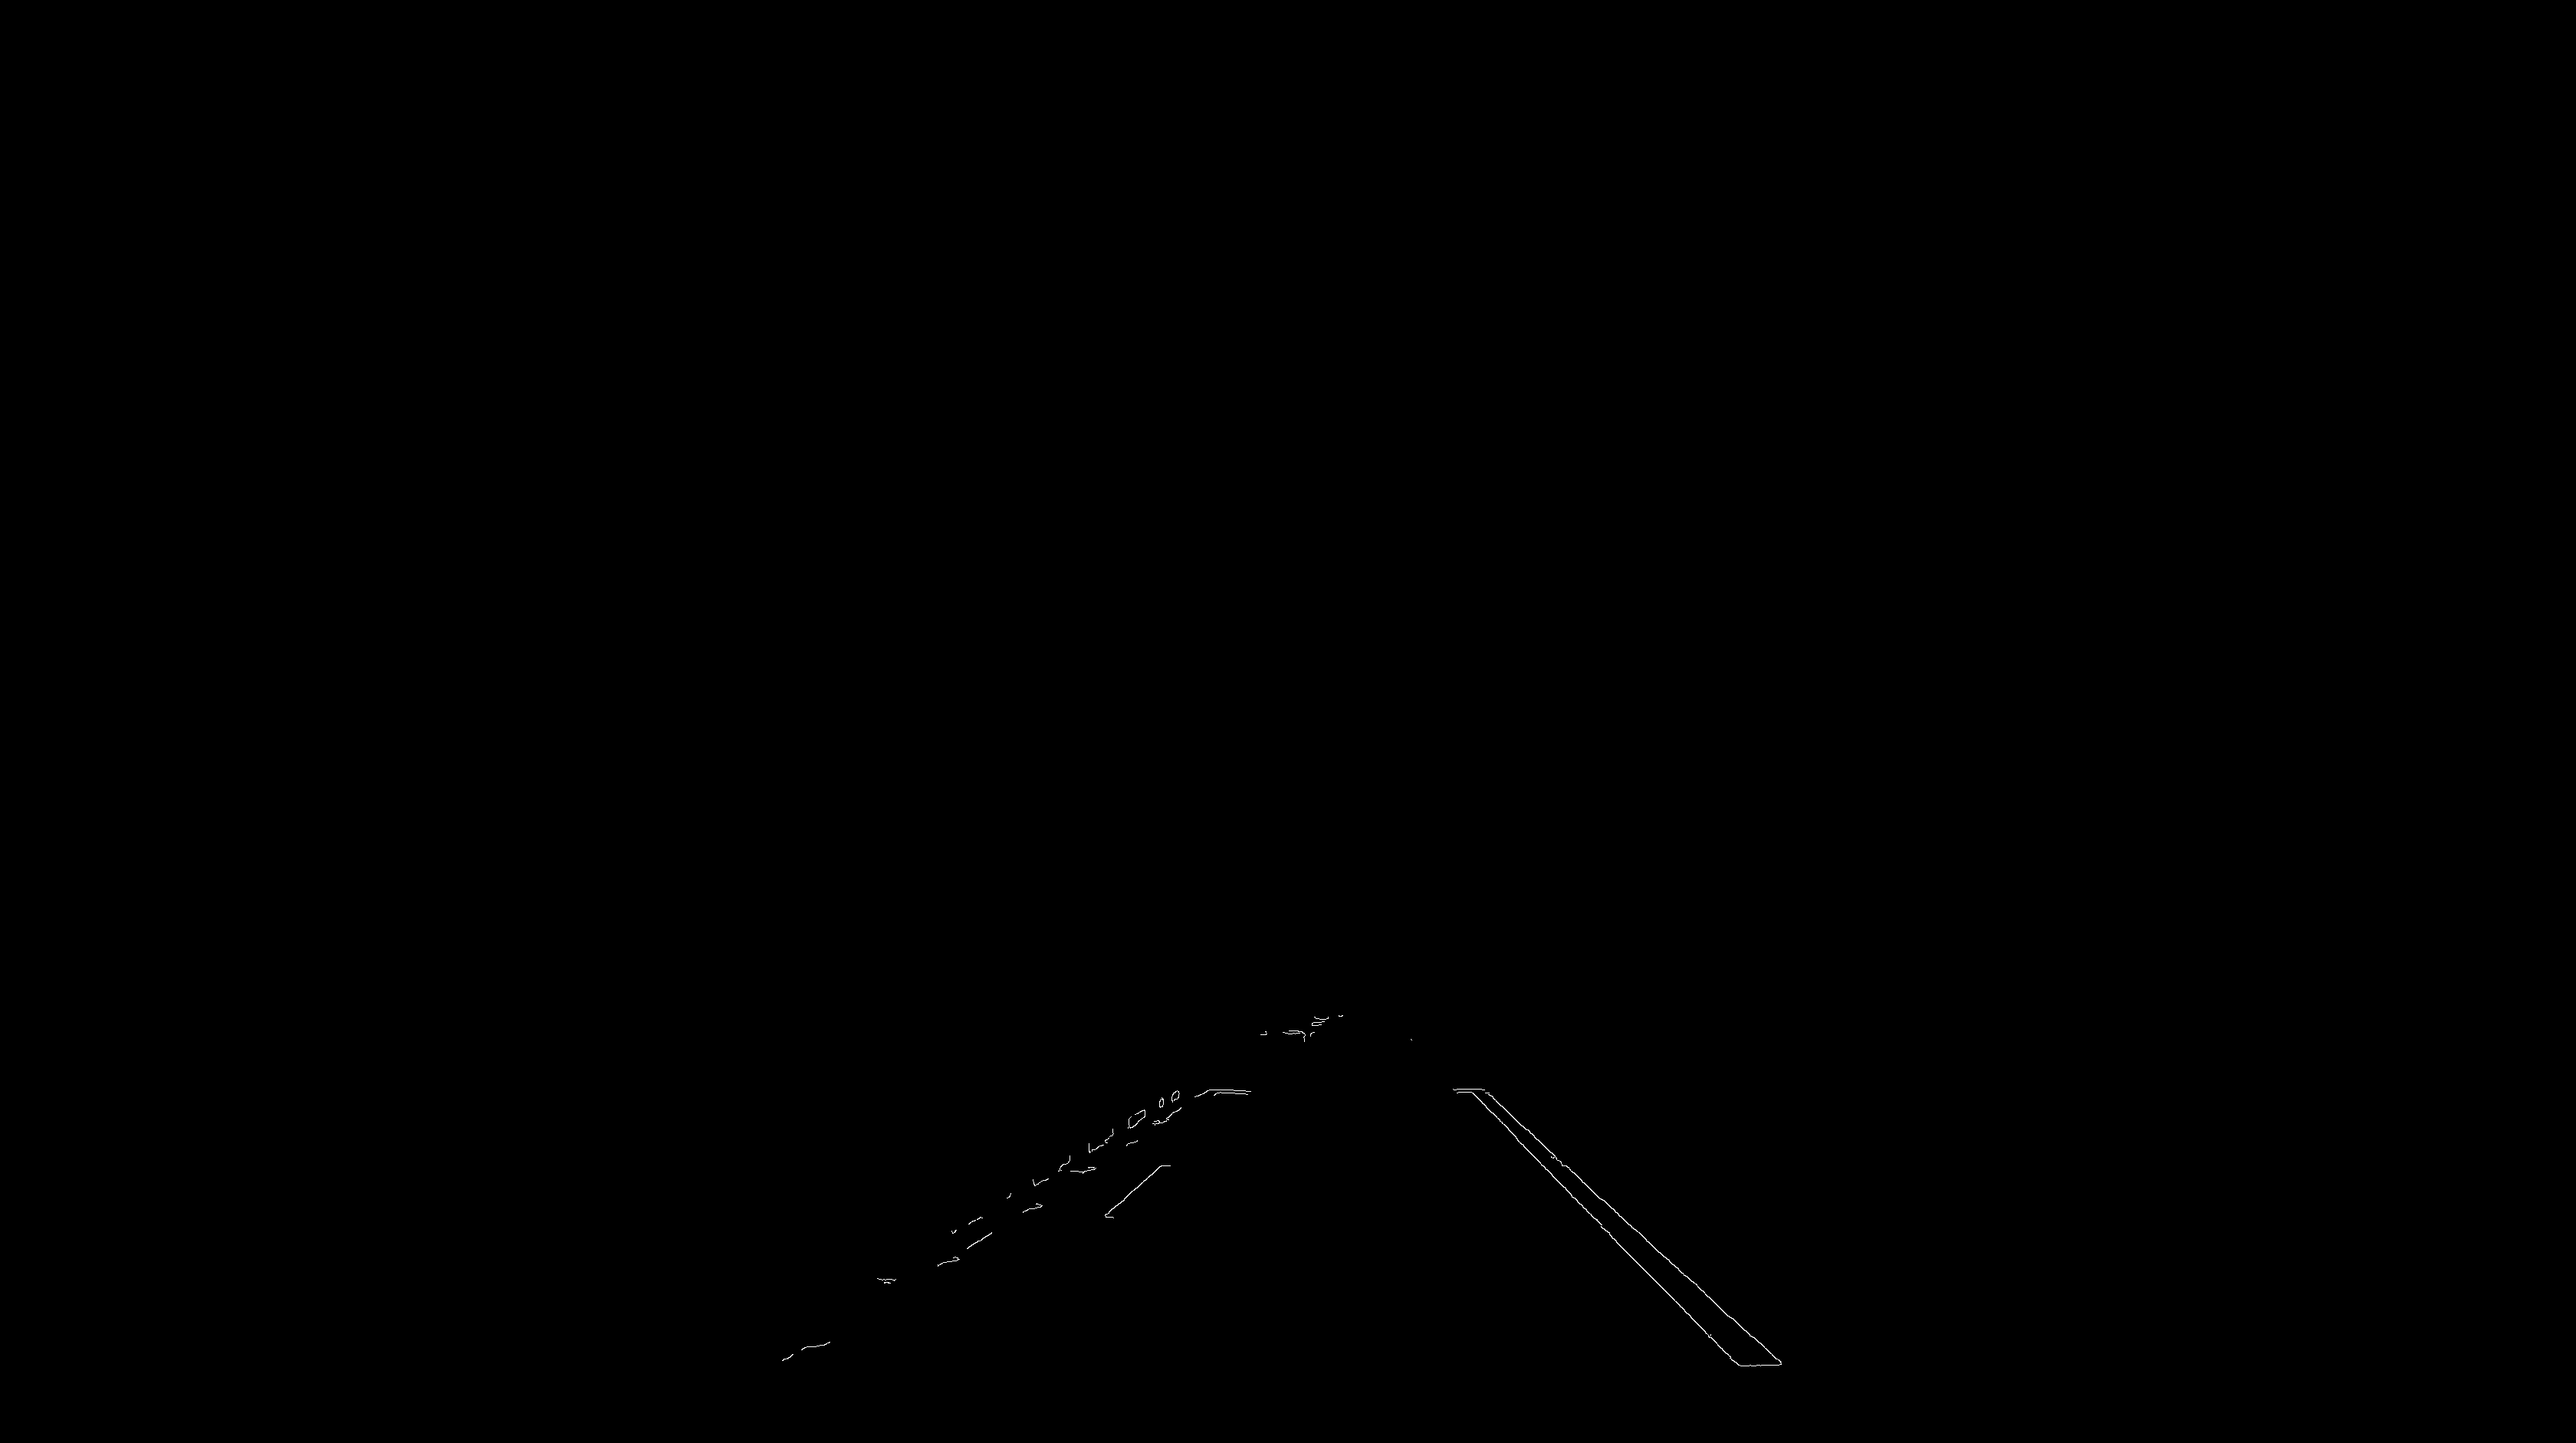

In [243]:
# Bitwise operation between poly and mask
line_masked = cv2.bitwise_xor(in_mask, out_mask)
masked = cv2.bitwise_and(canny, line_masked)
cv2_imshow(masked)

#3. Lane Detection

In [244]:
lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)

[[1916 1420 2166 1678]]
[[2147 1618 2238 1700]]
[[2016 1497 2076 1552]]
[[2164 1675 2262 1776]]
[[1971 1455 2028 1507]]
[[2063 1541 2111 1583]]
[[1262 1627 1293 1607]]
[[1895 1420 1932 1420]]
[[1441 1585 1512 1521]]
[[2277 1735 2323 1778]]
[[1262 1628 1292 1608]]
[[2258 1718 2282 1742]]
[[1506 1467 1539 1446]]
[[1587 1425 1624 1426]]
[[1586 1421 1631 1423]]
[[1421 1503 1442 1490]]
[[2270 1781 2296 1781]]
[[1934 1421 1969 1452]]
[[1420 1502 1442 1489]]
[[1676 1347 1711 1347]]
[[1512 1441 1537 1425]]
[[1446 1582 1513 1521]]
[[1512 1443 1537 1428]]
[[1512 1442 1538 1426]]
[[2200 1664 2227 1691]]
[[1047 1758 1072 1754]]
[[2043 1520 2063 1539]]
[[2282 1780 2307 1780]]
[[2074 1551 2104 1577]]
[[2273 1732 2307 1762]]
[[2018 1526 2037 1546]]
[[2230 1742 2254 1767]]
[[2156 1625 2196 1663]]
[[2177 1689 2205 1718]]
[[2011 1492 2066 1542]]
[[1941 1425 1984 1468]]
[[2133 1645 2162 1673]]
[[2051 1561 2072 1582]]


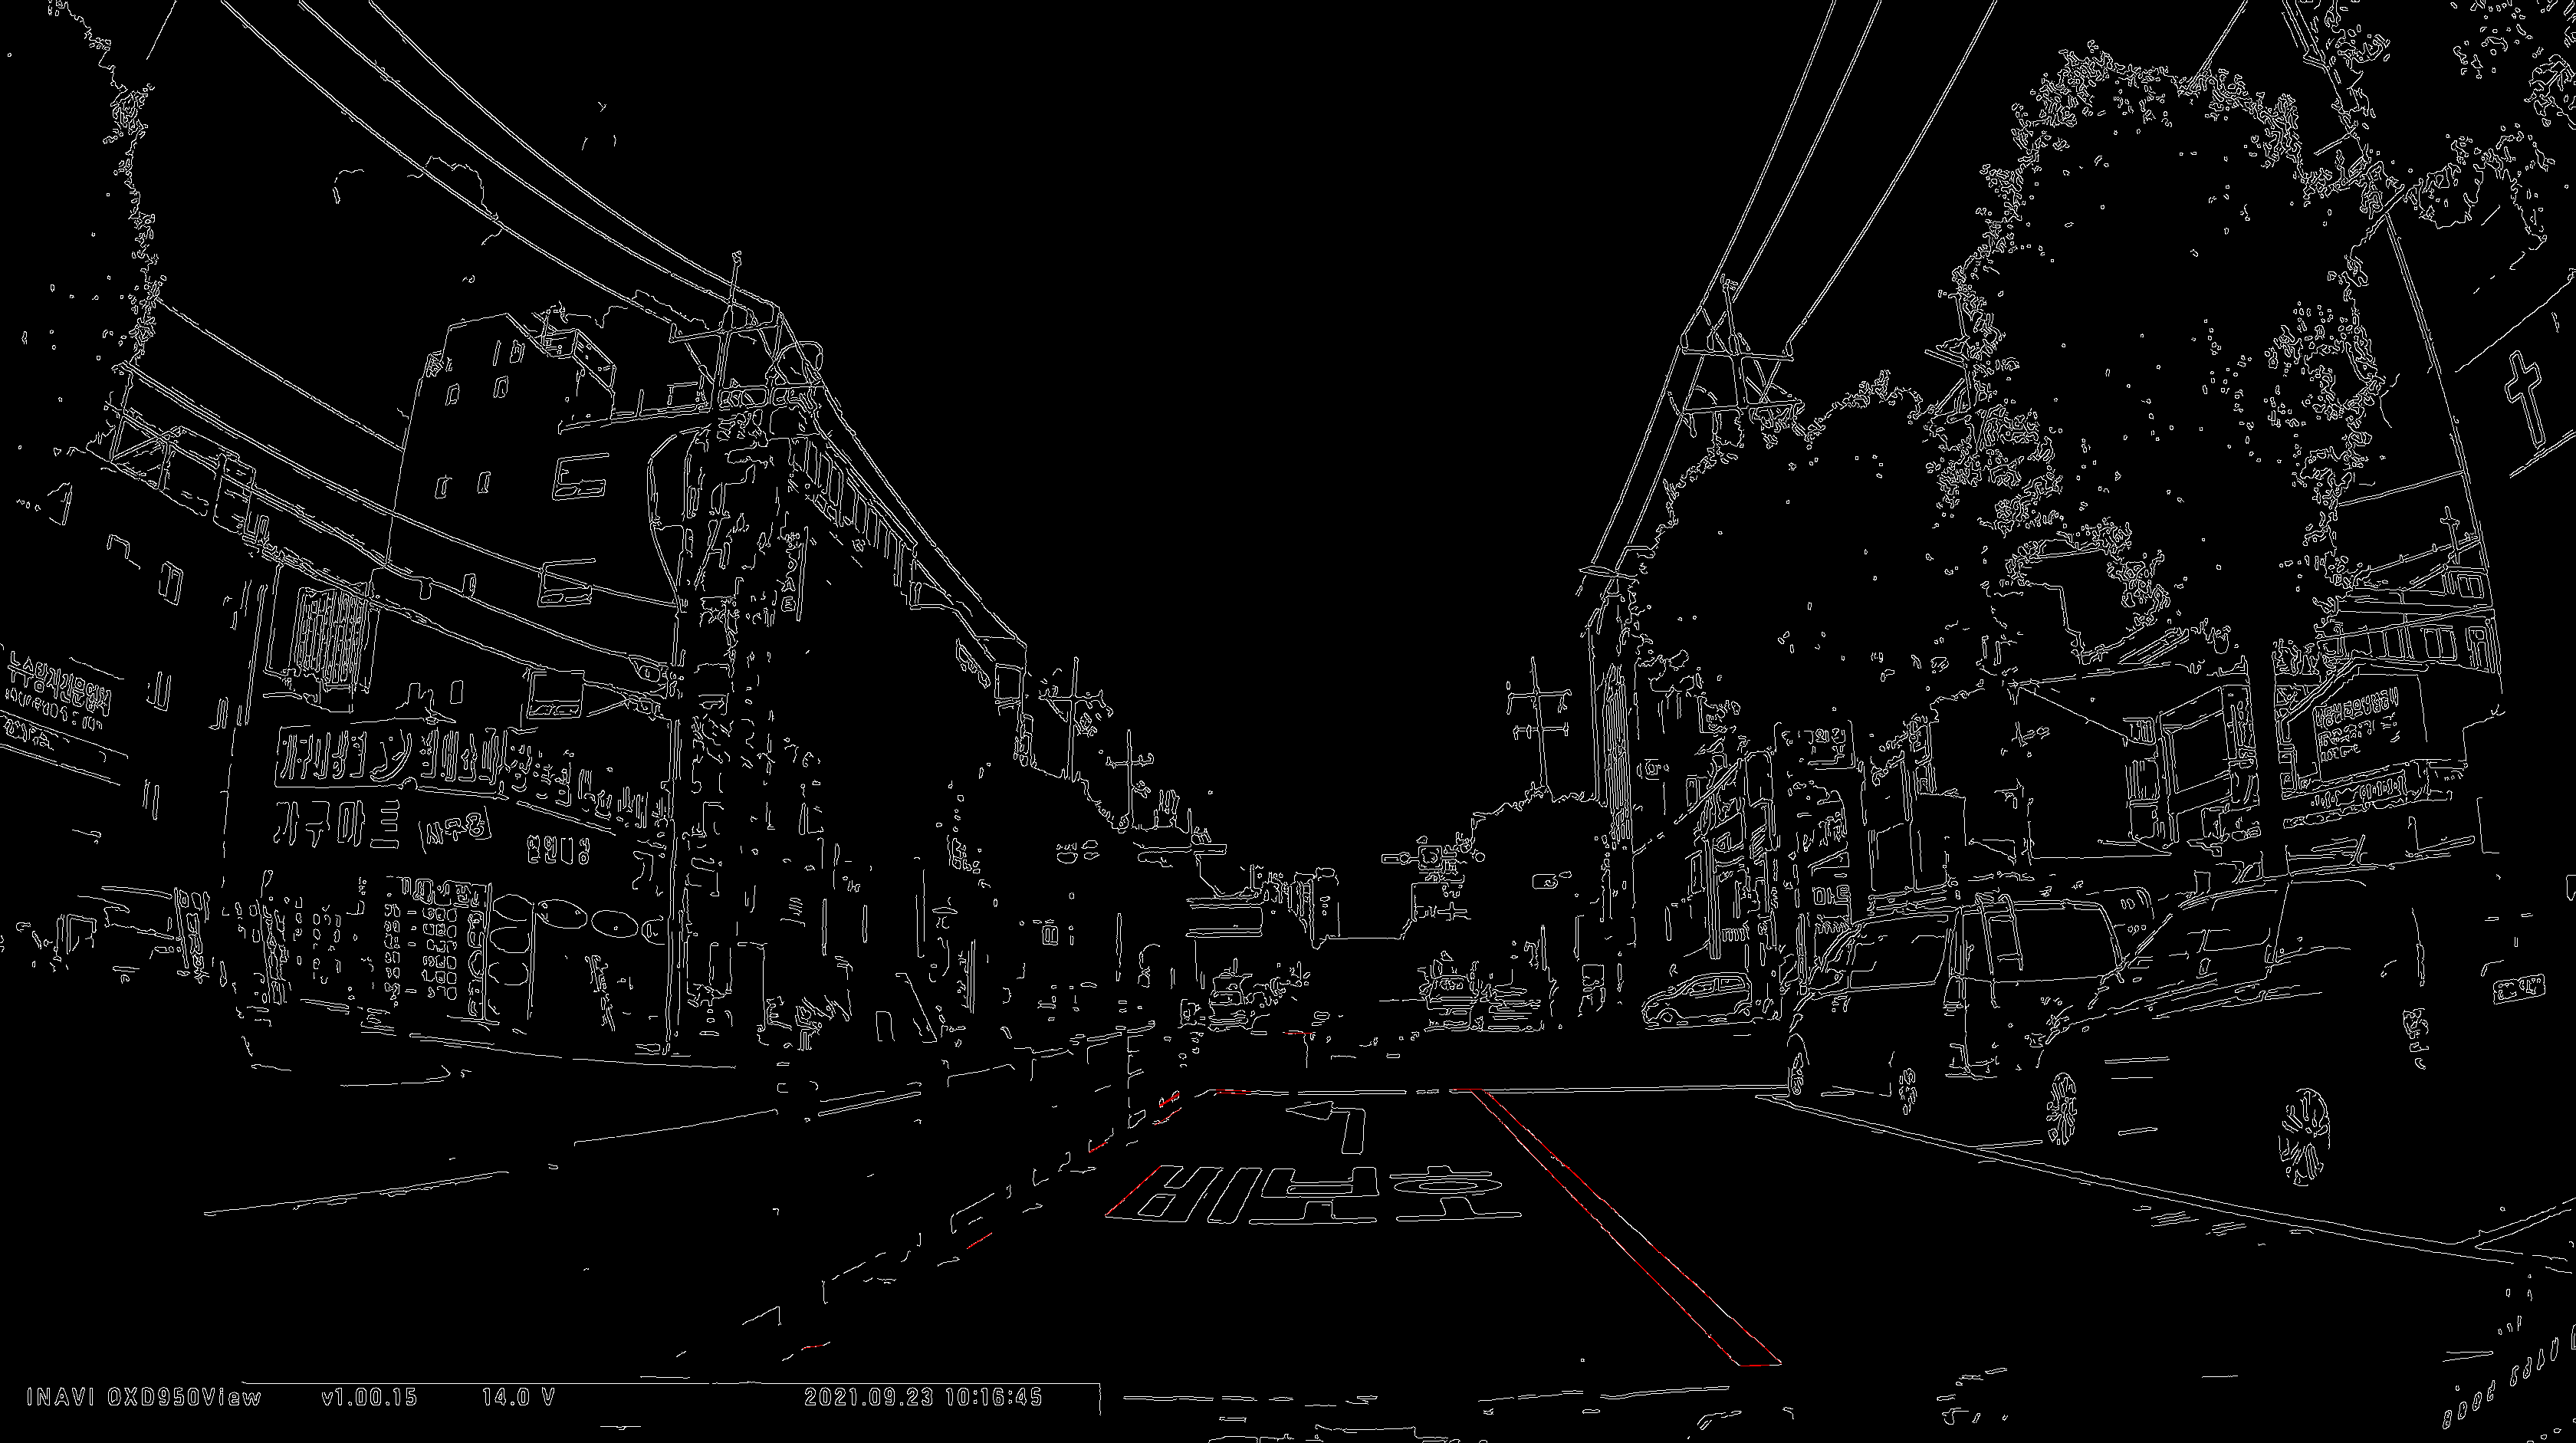

In [245]:
image_rgb = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
if lines is not None:
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        cv2.line(image_rgb, (x1,y1), (x2,y2), (0,0,255), 1)
    cv2_imshow(image_rgb)

In [246]:
frame = cv2.imread(file_name)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 5)
cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.